In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from matplotlib import font_manager, rc  
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

- Series 활용
- sr index: 학생 이름 / sr value: 영어점수

In [43]:
sr = pd.Series([90,90,55,60,76,80,76,88,30,25])
sr.index=['짱구', '유리', '훈이', '맹구', '흰둥이', '이슬', '수지', '철수1', '철수2', '철수3']
sr

짱구     90
유리     90
훈이     55
맹구     60
흰둥이    76
이슬     80
수지     76
철수1    88
철수2    30
철수3    25
dtype: int64

In [44]:
#영어점수 중 가장 높은 것은?
sr.max()

90

##### .nlargest()
- 가장 높은 수 출력해주는 함수
-nlargest(x, y) -> x: 가장 높은 수 몇개 뽑을지 / y: 중복되는 값 몇개 뽑을 지

In [45]:
#영어점수가 가장 높은 학생은?
#.nlargest: 가장 큰 수가 몇명이니?
#          (가장 높은 점수 하나만 뽑을 거야, 중복되는 값 다 출력)
sr.nlargest(1, keep='all').index

Index(['짱구', '유리'], dtype='object')

In [46]:
#영어 점수가 80점 이상인 학생의 이름+점수를 출력해주기
sr[sr>=80]

짱구     90
유리     90
이슬     80
철수1    88
dtype: int64

In [47]:
#영어 점수가 50점 이상 80점 이하인 학생의 이름+점수를 출력해주기
sr[(sr>=50)&(sr<=80)]

훈이     55
맹구     60
흰둥이    76
이슬     80
수지     76
dtype: int64

In [48]:
#영어 점수의 평군을 출력해주기
sr.mean()

67.0

<AxesSubplot:>

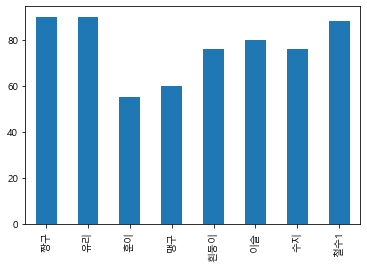

In [49]:
#영어 점수가 50점 이상인 학생의 바 차트 그리기
sr50=sr[sr>=50]
sr50.plot(kind='bar')

In [50]:
#키보드로 학생들의 이름을 입력 받고, 그 학생의 영어 점수를 출력받아봅시다.
name = input('이름을 입력하세요: ')
print(name, sr[name])

수지 76


- .quantile(): 백분위 수 구할 때 사용

In [53]:
sr.quantile([0.3, 0.6, 0.8])

0.3    58.5
0.6    77.6
0.8    88.4
dtype: float64

In [51]:
#영어 점수 등급을 매기기
#F: 0-59, D: 60-69, C: 70-79, B: 80-89 A:90-100

#bins: 구간 - 왼쪽초과 오른쪽이하
bins=[-1, 59, 69, 79, 89, 100]

#labels: 구분
labels=["F", "D", "C", "B", "A"]

print('-'*20)
print('이름', '영어', '등급', sep='\t')
print('-'*20)

result = pd.cut(sr, bins, labels=labels)
result

--------------------
이름	영어	등급
--------------------


짱구     A
유리     A
훈이     F
맹구     D
흰둥이    C
이슬     B
수지     C
철수1    B
철수2    F
철수3    F
dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

In [52]:
print('-'*20)
print('이름', '영어', '등급', sep='\t')
print('-'*20)
sr_cut=pd.cut(sr, [-1, 59, 69, 79, 89, 100], labels = ["F", "D", "C", "B", "A"])
sr_cut

--------------------
이름	영어	등급
--------------------


짱구     A
유리     A
훈이     F
맹구     D
흰둥이    C
이슬     B
수지     C
철수1    B
철수2    F
철수3    F
dtype: category
Categories (5, object): ['F' < 'D' < 'C' < 'B' < 'A']

- 위의 결과처럼 결과값에 영어 점수가 들어가지 못한다.
- Series의 한계(열이 한개밖에 못만드는 점)를 극복하기 위해 DataFrame으로 변환해주기

##### 과일 데이터를 만들어보고 해당 데이터를 파이차트로 표현하기

In [54]:
#과일 데이터
fruit = pd.Series([10,20,30,50], index=['딸기', '귤', '수박', '사과'], name='과일')
fruit

딸기    10
귤     20
수박    30
사과    50
Name: 과일, dtype: int64

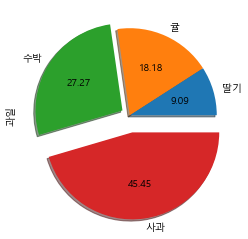

In [57]:
#과일의 비율을 파이차트로 그려보기
fruit.plot(kind='pie', autopct='%.2f', shadow=True, explode=[0, 0, 0.1, 0.2])
plt.show()